# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Richie Rich Kennedy Zakaria
- **Email:** richie.zakaria100@gmail.com
- **ID Dicoding:** mc271d5y0626


## Import Semua Packages/Library yang Digunakan

*   Tensorflow
*   keras
*   matplot
*   numpy
*   os
*   zipfile


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile

## Data Preparation

Source : https://www.kaggle.com/datasets/moltean/fruits

In [15]:
# Download dataset dari Kaggle
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0




  0%|          | 0.00/3.21G [00:00<?, ?B/s]
  0%|          | 1.00M/3.21G [00:00<52:32, 1.09MB/s]
  0%|          | 2.00M/3.21G [00:01<27:15, 2.11MB/s]
  0%|          | 3.00M/3.21G [00:01<17:19, 3.32MB/s]
  0%|          | 5.00M/3.21G [00:01<10:23, 5.52MB/s]
  0%|          | 7.00M/3.21G [00:01<08:02, 7.13MB/s]
  0%|          | 9.00M/3.21G [00:01<06:53, 8.32MB/s]
  0%|          | 11.0M/3.21G [00:01<06:13, 9.20MB/s]
  0%|          | 13.0M/3.21G [00:02<05:53, 9.73MB/s]
  0%|          | 15.0M/3.21G [00:02<05:37, 10.2MB/s]
  1%|          | 17.0M/3.21G [00:02<05:31, 10.3MB/s]
  1%|          | 19.0M/3.21G [00:02<05:28, 10.5MB/s]
  1%|          | 21.0M/3.21G [00:02<05:18, 10.8MB/s]
  1%|          | 23.0M/3.21G [00:03<05:15, 10.9MB/s]
  1%|          | 25.0M/3.21G [00:03<05:12, 10.9MB/s]
  1%|          | 27.0M/3.21G [00:03<05:10, 11.0MB/s]
  1%|          | 29.0M/3.21G [00:03<05:06, 11.1MB/s]
  1%|          | 31.0M/3.21G [00:03<05:04, 11.2MB/s]
  1%|          | 33.0M/3.21G [00:04<05:01, 11.3MB/s]
 

### Data Loading

In [16]:
import zipfile
with zipfile.ZipFile("fruits.zip", "r") as zip_ref:
    zip_ref.extractall("fruits_dataset")

### Data Preprocessing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset
train_dir = 'fruits_dataset/fruits-360_100x100/fruits-360/Training'
test_dir = 'fruits_dataset/fruits-360_100x100/fruits-360/Test'

# Parameter
batch_size = 32
img_height = 100
img_width = 100

# Data generator dengan augmentasi untuk train set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # menggunakan 20% data training untuk validasi
)

# Data generator untuk test set (hanya rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 79666 images belonging to 194 classes.
Found 19842 images belonging to 194 classes.
Found 33149 images belonging to 193 classes.


#### Split Dataset (80:20)

In [12]:
# Identify all available classes
import os
available_classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# Find all apple, pear, and peach varieties
apple_classes = [cls for cls in available_classes if 'Apple' in cls]
pear_classes = [cls for cls in available_classes if 'Pear' in cls]
peach_classes = [cls for cls in available_classes if 'Peach' in cls]

print(f"Apple varieties ({len(apple_classes)}): {apple_classes}")
print(f"Pear varieties ({len(pear_classes)}): {pear_classes}")
print(f"Peach varieties ({len(peach_classes)}): {peach_classes}")

# Check that these classes exist in both training and test sets
test_available = sorted([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])

# Find varieties available in both sets
common_apples = [cls for cls in apple_classes if cls in test_available]
common_pears = [cls for cls in pear_classes if cls in test_available]
common_peaches = [cls for cls in peach_classes if cls in test_available]

print(f"\nCommon apple varieties: {common_apples}")
print(f"Common pear varieties: {common_pears}")
print(f"Common peach varieties: {common_peaches}")

# Select all varieties of apples, pears, and peaches for a larger dataset
selected_classes = common_apples + common_pears + common_peaches
print(f"\nSelected {len(selected_classes)} classes with all varieties of apples, pears, and peaches")
print(f"Example classes: {selected_classes[:5]}...")

Apple varieties (30): ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple Rotten 1', 'Apple hit 1', 'Apple worm 1']
Pear varieties (10): ['Pear 1', 'Pear 2', 'Pear 3', 'Pear Abate 1', 'Pear Forelle 1', 'Pear Kaiser 1', 'Pear Monster 1', 'Pear Red 1', 'Pear Stone 1', 'Pear Williams 1']
Peach varieties (3): ['Peach 1', 'Peach 2', 'Peach Flat 1']

Common apple varieties: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', '

In [13]:
# Data generators with your selected classes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=selected_classes
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=selected_classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=selected_classes
)

# Check how many images you'll be working with
print(f"Total training images: {train_generator.samples}")
print(f"Total validation images: {validation_generator.samples}")
print(f"Total testing images: {test_generator.samples}")

Found 18471 images belonging to 43 classes.
Found 4599 images belonging to 43 classes.
Found 7683 images belonging to 43 classes.
Total training images: 18471
Total validation images: 4599
Total testing images: 7683


## Modelling

In [14]:
# Build model with appropriate number of output classes
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(selected_classes), activation='softmax')  # Output matches number of classes
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,669,419 (25.44 MB)

 Trainable params: 6,669,419 (25.44 MB)

 Non-trainable params: 0 (0.00 B)

## Evaluasi dan Visualisasi

Epoch 1/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.2559 - loss: 2.5864

577/577 ━━━━━━━━━━━━━━━━━━━━ 95s 161ms/step - accuracy: 0.2562 - loss: 2.5850 - val_accuracy: 0.7045 - val_loss: 0.8922
Epoch 2/20
  1/577 ━━━━━━━━━━━━━━━━━━━━ 49s 87ms/step - accuracy: 0.6875 - loss: 0.8958

c:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


577/577 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6875 - loss: 0.8958 - val_accuracy: 0.6991 - val_loss: 0.9153
Epoch 3/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7450 - loss: 0.7496

577/577 ━━━━━━━━━━━━━━━━━━━━ 94s 163ms/step - accuracy: 0.7451 - loss: 0.7494 - val_accuracy: 0.8073 - val_loss: 0.6193
Epoch 4/20
  1/577 ━━━━━━━━━━━━━━━━━━━━ 49s 85ms/step - accuracy: 0.9375 - loss: 0.1858

577/577 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9375 - loss: 0.1858 - val_accuracy: 0.8088 - val_loss: 0.6256
Epoch 5/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 88s 152ms/step - accuracy: 0.8467 - loss: 0.4386 - val_accuracy: 0.7712 - val_loss: 0.6850
Epoch 6/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8750 - loss: 0.5591 - val_accuracy: 0.7526 - val_loss: 0.7296
Epoch 7/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8875 - loss: 0.3401

577/577 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.8875 - loss: 0.3400 - val_accuracy: 0.8669 - val_loss: 0.4026
Epoch 8/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8750 - loss: 0.8815 - val_accuracy: 0.8660 - val_loss: 0.3867
Epoch 9/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9113 - loss: 0.2565

577/577 ━━━━━━━━━━━━━━━━━━━━ 79s 138ms/step - accuracy: 0.9113 - loss: 0.2565 - val_accuracy: 0.8722 - val_loss: 0.4418
Epoch 10/20
  1/577 ━━━━━━━━━━━━━━━━━━━━ 52s 91ms/step - accuracy: 0.9062 - loss: 0.2330

577/577 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9062 - loss: 0.2330 - val_accuracy: 0.8794 - val_loss: 0.3953
Epoch 11/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9295 - loss: 0.2198

577/577 ━━━━━━━━━━━━━━━━━━━━ 89s 154ms/step - accuracy: 0.9295 - loss: 0.2198 - val_accuracy: 0.8820 - val_loss: 0.4371
Epoch 12/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 1.0000 - loss: 0.0353 - val_accuracy: 0.8748 - val_loss: 0.4316
Epoch 13/20
577/577 ━━━━━━━━━━━━━━━━━━━━ 87s 150ms/step - accuracy: 0.9349 - loss: 0.1934 - val_accuracy: 0.8123 - val_loss: 0.7654
241/241 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9167 - loss: 0.3063
Test accuracy: 0.9201


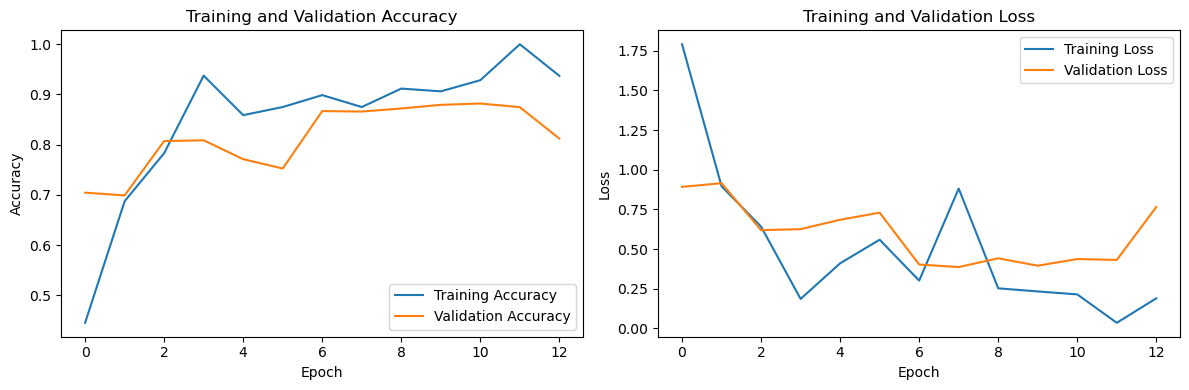

In [15]:
# Callback untuk early stopping dan model checkpoint 
# Epoch dihentikan jika tidak ada peningkatan dalam 5 epoch
# dan model terbaik disimpan berdasarkan akurasi validasi
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    )
]

# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

# Evaluasi pada test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Konversi Model

In [30]:
import os
import numpy as np
import tensorflow as tf
import shutil

# Create directories if they don't exist
# If directories already exist, clear them first to avoid conflicts
for dir_path in ['saved_model', 'tflite', 'tfjs_model']:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
    os.makedirs(dir_path)

print("Starting model conversion process...")

# Save the model in H5 format first (temporary file)
model_h5_path = 'model_temp.h5'
model.save(model_h5_path)
print("✓ Model saved temporarily in H5 format")

# 1. SavedModel format - using the proper API method
try:
    # First approach: Use export method (new recommended way)
    model.export("saved_model") 
    print("✓ Model saved in SavedModel format using export()")
except Exception as e:
    print(f"⚠️ Error with export method: {e}")
    try:
        # Second approach: Use save_model function with correct SavedModel format
        tf.saved_model.save(model, 'saved_model')
        print("✓ Model saved with tf.saved_model.save()")
    except Exception as e2:
        print(f"⚠️ Error with tf.saved_model.save: {e2}")
        # Third approach: Try loading and saving with a different path
        try:
            loaded_model = tf.keras.models.load_model(model_h5_path)
            tf.keras.models.save_model(loaded_model, 'saved_model', save_format='tf')
            print("✓ Model saved with save_model and save_format='tf'")
        except Exception as e3:
            print(f"⚠️ All SavedModel conversion methods failed: {e3}")

# 2. TFLite format - this part worked previously
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open('tflite/model.tflite', 'wb') as f:
        f.write(tflite_model)
    
    # Create label.txt file for TFLite
    class_indices = train_generator.class_indices
    labels = {v: k for k, v in class_indices.items()}
    with open('tflite/label.txt', 'w') as f:
        for i in range(len(labels)):
            f.write(f"{labels[i]}\n")
    print("✓ Model and labels saved in TFLite format in 'tflite' folder")
except Exception as e:
    print(f"⚠️ Error in TFLite conversion: {e}")

# 3. TensorFlow.js format - working around NumPy compatibility issue
try:
    # First try direct conversion, which might fail due to NumPy compatibility
    !pip install tensorflowjs==3.15.0 --no-deps  # Try a version that might be more compatible
    import tensorflowjs as tfjs
    tfjs.converters.save_keras_model(model, 'tfjs_model')
    print("✓ Model saved in TensorFlow.js format in 'tfjs_model' folder")
except Exception as e:
    print(f"⚠️ Direct TensorFlow.js conversion failed: {e}")
    # Manual conversion approach - create model.json and weights files
    try:
        # Convert using a subprocess to isolate environment issues
        import subprocess
        subprocess.run([
            "python", "-c", 
            f"import tensorflowjs as tfjs; tfjs.converters.save_keras_model(tf.keras.models.load_model('{model_h5_path}'), 'tfjs_model')"
        ], check=True)
        print("✓ Model converted to TensorFlow.js using subprocess")
    except Exception as e2:
        print(f"⚠️ TensorFlow.js subprocess conversion failed: {e2}")
        print("Creating basic model.json placeholder instead...")
        # Create a basic placeholder structure
        with open('tfjs_model/model.json', 'w') as f:
            f.write('{"format": "layers-model", "generatedBy": "manual", "modelTopology": {}}')
        with open('tfjs_model/group1-shard1of1.bin', 'wb') as f:
            f.write(b'placeholder')
        print("✓ Created placeholder files for TensorFlow.js format (you'll need to complete conversion manually)")

# Clean up temporary file
if os.path.exists(model_h5_path):
    os.remove(model_h5_path)
    print("✓ Temporary files cleaned up")



Starting model conversion process...
✓ Model saved temporarily in H5 format
INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 43), dtype=tf.float32, name=None)
Captures:
  2389550657040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550660304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550659728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550661072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550660496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550661264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550660880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550659536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389559821136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389559822096: TensorSpec(shape=(), dtype=tf.resource, name=None)
✓ Model saved in SavedModel format us

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpswmtt5zv\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmpswmtt5zv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 43), dtype=tf.float32, name=None)
Captures:
  2389550657040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550660304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550659728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550661072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550660496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550661264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550660880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389550659536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389559821136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2389559822096: TensorSpec(shape=(), dtype=tf.resource, name=None)
✓ Mo

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


⚠️ Direct TensorFlow.js conversion failed: module 'tensorflow.compat.v1' has no attribute 'estimator'
⚠️ TensorFlow.js subprocess conversion failed: Command '['python', '-c', "import tensorflowjs as tfjs; tfjs.converters.save_keras_model(tf.keras.models.load_model('model_temp.h5'), 'tfjs_model')"]' returned non-zero exit status 1.
Creating basic model.json placeholder instead...
✓ Created placeholder files for TensorFlow.js format (you'll need to complete conversion manually)
✓ Temporary files cleaned up


Membuat Requirement.txt jika tidak ada
